In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

####Frequent category imputation

This way of imputing category feature will impact/distort data a lot when the percent of missing values is higher for that feature

In [ ]:
df = pd.read_csv('House price.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df = pd.read_csv('House price.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df.shape

(1460, 4)

In [ ]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
#percentage of missing values
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

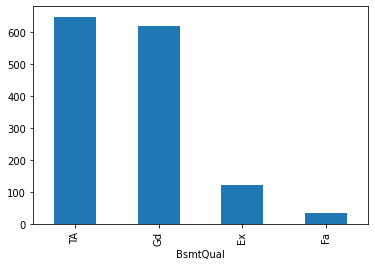

In [ ]:
#computre frequency of each catgory in all features

df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [ ]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

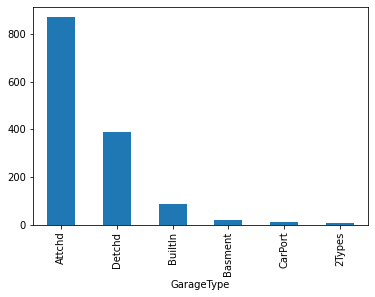

In [ ]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

In [ ]:
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

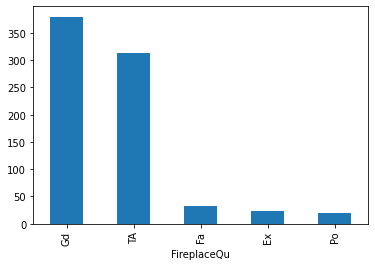

In [ ]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending=False).plot.bar()

In [ ]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
#Impute function to replace NAN values

def impute_nan(df,variable):
  frequent = df[variable].value_counts().index[0]
  df[variable].fillna(frequent,inplace=True)

In [ ]:
features = ['BsmtQual','FireplaceQu','GarageType']
for feature in features:
  impute_nan(df,feature)


In [ ]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

####Adding a new feature to capture NAN
1. This will increase new features
2. This works well for the feature with more NAN values


In [ ]:
df1 = pd.read_csv('House price.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
#creating new features for missing values
df1['BsmtQual_NAN'] = np.where(df1.BsmtQual.isnull(),1,0)
df1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_NAN
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
frequent = df1.BsmtQual.mode()[0]
df1.BsmtQual.fillna(frequent, inplace=True)

In [ ]:
df1['FireplaceQu_NAN'] = np.where(df1.FireplaceQu.isnull(),1,0)

In [ ]:
###

####suppose if we have more categories we will replace NAN with new category

In [ ]:
df2 = pd.read_csv('House price.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df2.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
def impute_new_Category(df,variable):
  df[variable + '_new_category'] = np.where(df[variable].isnull(),'UnKnown',df[variable])
  df.drop(columns=[variable],inplace=True)

In [ ]:
features = ['BsmtQual','FireplaceQu','GarageType']
for feature in features:
  impute_new_Category(df2,feature)

In [ ]:
df2.head()

,SalePrice,BsmtQual_new_category,FireplaceQu_new_category,GarageType_new_category
0,208500,Gd,UnKnown,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


####Handling Categorical features

####onehot encoding

In [ ]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1 = pd.read_csv('Titanic.csv',usecols=['Sex'])
df1.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [ ]:
#encoding
pd.get_dummies(df1).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
df2 = pd.read_csv('Titanic.csv',usecols=['Embarked'])
df2.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [ ]:
df2.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df2.dropna(inplace=True)

In [ ]:
pd.get_dummies(df2)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
#if there are n categories we have to take n-1 features in onehot encoding
pd.get_dummies(df2,drop_first=True)

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


####Ordinal Number Encoding

Used for ranking

In [ ]:
import datetime

In [ ]:
today_date = datetime.datetime.today()

In [ ]:
today_date

datetime.datetime(2022, 7, 28, 5, 29, 17, 61508)

In [ ]:
#date difference
today_date - datetime.timedelta(2)

datetime.datetime(2022, 7, 26, 5, 29, 17, 61508)

In [ ]:
#List comprehension
days = [today_date - datetime.timedelta(x) for x in range(0,15)]

In [ ]:
Data = pd.DataFrame(days)
Data.columns = ['Day']
Data.head()

,Day
0,2022-07-28 05:29:17.061508
1,2022-07-27 05:29:17.061508
2,2022-07-26 05:29:17.061508
3,2022-07-25 05:29:17.061508
4,2022-07-24 05:29:17.061508


In [ ]:
Data['Day'].dt.day_name()

0      Thursday
1     Wednesday
2       Tuesday
3        Monday
4        Sunday
5      Saturday
6        Friday
7      Thursday
8     Wednesday
9       Tuesday
10       Monday
11       Sunday
12     Saturday
13       Friday
14     Thursday
Name: Day, dtype: object

In [ ]:
Data['DayName']=Data['Day'].dt.day_name()

In [ ]:
Data

,Day,DayName
0,2022-07-28 05:29:17.061508,Thursday
1,2022-07-27 05:29:17.061508,Wednesday
2,2022-07-26 05:29:17.061508,Tuesday
3,2022-07-25 05:29:17.061508,Monday
4,2022-07-24 05:29:17.061508,Sunday
5,2022-07-23 05:29:17.061508,Saturday
6,2022-07-22 05:29:17.061508,Friday
7,2022-07-21 05:29:17.061508,Thursday
8,2022-07-20 05:29:17.061508,Wednesday
9,2022-07-19 05:29:17.061508,Tuesday


In [ ]:
dict = {
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
}

In [ ]:
dict

{'Friday': 5,
 'Monday': 1,
 'Saturday': 6,
 'Sunday': 7,
 'Thursday': 4,
 'Tuesday': 2,
 'Wednesday': 3}

In [ ]:
Data['dayNo'] = Data['DayName'].map(dict)
Data

,Day,DayName,dayNo
0,2022-07-28 05:29:17.061508,Thursday,4
1,2022-07-27 05:29:17.061508,Wednesday,3
2,2022-07-26 05:29:17.061508,Tuesday,2
3,2022-07-25 05:29:17.061508,Monday,1
4,2022-07-24 05:29:17.061508,Sunday,7
5,2022-07-23 05:29:17.061508,Saturday,6
6,2022-07-22 05:29:17.061508,Friday,5
7,2022-07-21 05:29:17.061508,Thursday,4
8,2022-07-20 05:29:17.061508,Wednesday,3
9,2022-07-19 05:29:17.061508,Tuesday,2


####Count or Frequency Encoding
replacing the value with number of time it occured

Advantages:

1) easy to implement

2) we are not increasing feature space

Disadvantages:

1) if two or more features have same frequency ...it will provide same weight to all these features


In [ ]:
adult = pd.read_csv('adult.data')

In [ ]:
col_names = [
             "age",
              "workclass",
              "fnlwgt",
              "education",
              "educationNum",
              "maritalStatus",
              "occupation",
              "relationship",
              "race",
              "sex",
              "capitalGain",
              "capitalLoss",
              "hoursPerWeek",
              "nativeCountry", 
              "Above50K"
            ]

In [ ]:
adult.columns = col_names

In [ ]:
adult.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Above50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
freq_dict = adult['nativeCountry'].value_counts().to_dict()

In [ ]:
freq_dict

{' ?': 583,
 ' Cambodia': 19,
 ' Canada': 121,
 ' China': 75,
 ' Columbia': 59,
 ' Cuba': 95,
 ' Dominican-Republic': 70,
 ' Ecuador': 28,
 ' El-Salvador': 106,
 ' England': 90,
 ' France': 29,
 ' Germany': 137,
 ' Greece': 29,
 ' Guatemala': 64,
 ' Haiti': 44,
 ' Holand-Netherlands': 1,
 ' Honduras': 13,
 ' Hong': 20,
 ' Hungary': 13,
 ' India': 100,
 ' Iran': 43,
 ' Ireland': 24,
 ' Italy': 73,
 ' Jamaica': 81,
 ' Japan': 62,
 ' Laos': 18,
 ' Mexico': 643,
 ' Nicaragua': 34,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Peru': 31,
 ' Philippines': 198,
 ' Poland': 60,
 ' Portugal': 37,
 ' Puerto-Rico': 114,
 ' Scotland': 12,
 ' South': 80,
 ' Taiwan': 51,
 ' Thailand': 18,
 ' Trinadad&Tobago': 19,
 ' United-States': 29169,
 ' Vietnam': 67,
 ' Yugoslavia': 16}

In [ ]:
adult['nativeCountry'] = adult['nativeCountry'].map(freq_dict)
adult['nativeCountry']

0        29169
1        29169
2        29169
3           95
4        29169
         ...  
32555    29169
32556    29169
32557    29169
32558    29169
32559    29169
Name: nativeCountry, Length: 32560, dtype: int64

In [ ]:
adult['nativeCountry'].value_counts()

29169    29169
643        643
583        583
198        198
137        137
121        121
114        114
106        106
100        100
95          95
90          90
81          81
80          80
75          75
73          73
70          70
67          67
64          64
62          62
60          60
59          59
29          58
51          51
44          44
43          43
19          38
37          37
18          36
34          34
31          31
28          28
13          26
24          24
20          20
16          16
14          14
12          12
1            1
Name: nativeCountry, dtype: int64

####Target guided ordinal encoding

1. Ordering the labels according to the target
2. Replace the lable by joint probability of 0 or 1

In [ ]:
titanic = pd.read_csv('Titanic.csv',usecols = ['Cabin','Survived'])
titanic.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
titanic.isnull().sum()

Survived      0
Cabin       687
dtype: int64

In [ ]:
titanic['Cabin'].fillna('Missing',inplace=True)

In [ ]:
titanic.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [ ]:
titanic['Cabin'] = titanic['Cabin'].astype(str).str[0]
titanic.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [ ]:
titanic['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
ordinal_labels = titanic.groupby(['Cabin'])['Survived'].mean().sort_values().index


In [ ]:
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [ ]:
label_encode = {k:i for i,k in enumerate(ordinal_labels,0)}
label_encode

{'A': 2, 'B': 6, 'C': 4, 'D': 8, 'E': 7, 'F': 5, 'G': 3, 'M': 1, 'T': 0}

In [ ]:
titanic['Cabin'] = titanic['Cabin'].map(label_encode)

In [ ]:
titanic.head()

,Survived,Cabin
0,0,1
1,1,4
2,1,1
3,1,4
4,0,1


####Mean encoding


In [ ]:
tit = pd.read_csv('Titanic.csv',usecols = ['Cabin','Survived'])
tit.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
tit['Cabin'].fillna('Missing',inplace=True)

In [ ]:
tit['Cabin'] =  tit['Cabin'].astype(str).str[0]

In [ ]:
mean_encode = tit.groupby(['Cabin'])['Survived'].mean().to_dict()
mean_encode

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [ ]:
tit['Cabin'] = tit['Cabin'].map(mean_encode)
tit.head()

,Survived,Cabin
0,0,0.299854
1,1,0.593220
2,1,0.299854
3,1,0.593220
4,0,0.299854


#### Probability ratio encodng

In [ ]:
df = pd.read_csv('Titanic.csv',usecols = ['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
df['Cabin'].fillna('Missing',inplace = True)

In [ ]:
df.isnull().sum()

Survived    0
Cabin       0
dtype: int64

In [ ]:
df['Cabin'] =  df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [ ]:
prob_df = df.groupby(['Cabin'])['Survived'].mean()

In [ ]:
prob_df = pd.DataFrame(prob_df)

In [ ]:
prob_df.head()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000


In [ ]:
prob_df['died_prob'] = 1- prob_df['Survived']
prob_df

,Survived,died_prob
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [ ]:
prob_df['Probability_ratio'] =prob_df['Survived']/prob_df['died_prob']
prob_df.head()

,Survived,died_prob,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [ ]:
probability_encode = prob_df['Probability_ratio'].to_dict()
probability_encode

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [ ]:
df['Cabin_encoded'] = df['Cabin'].map(probability_encode)
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


###Feature Scaling
1) Standarsization and Normalization

2) Scaling to minimm and maximum

3) Scaling to Median and Quantiles

4) Gaussian Transformation

  a) Logarithmic transformation

  b) Reciprocal transformation

  c) Square root transformation
  
  d) Exponential transformation

  e) Box cox transmformation


### Standardization 
 we try to bring all features/variables to a similar scale cosidering the mean as 0 and std.dev as 1

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
data = pd.read_csv('titanic_train.csv',usecols=['Pclass','Age','Fare','Survived'])
data.head(5)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [ ]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [ ]:
#standard scalar from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
data_scaled = sc.fit_transform(data)

In [ ]:
data_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

###MIN MAX scaling
scales the values to between 0 and 1
x_scaled = (x - x_min)/(x_max - x_min)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

In [ ]:
data_minmax_scaled = min_max.fit_transform(data)
data_minmax_scaled

array([[0.        , 1.        , 0.27117366, 0.01415106],
       [1.        , 0.        , 0.4722292 , 0.13913574],
       [1.        , 1.        , 0.32143755, 0.01546857],
       ...,
       [0.        , 1.        , 0.34656949, 0.04577135],
       [1.        , 0.        , 0.32143755, 0.0585561 ],
       [0.        , 1.        , 0.39683338, 0.01512699]])

### scaling to median and Quantiles 
##Robust Scaler

It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [ ]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
data_robust_scaled = robust.fit_transform(data)
data_robust_scaled

array([[ 0.        ,  0.        , -0.46153846, -0.3120106 ],
       [ 1.        , -2.        ,  0.76923077,  2.46124229],
       [ 1.        ,  0.        , -0.15384615, -0.28277666],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.38960398],
       [ 1.        , -2.        , -0.15384615,  0.67328148],
       [ 0.        ,  0.        ,  0.30769231, -0.29035583]])

##Gaussian transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

  a) Logarithmic transformation

  b) Reciprocal transformation

  c) Square root transformation
  
  d) Exponential transformation

  e) Box cox transmformation

In [ ]:
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
 df.Age.fillna(df.Age.median(),inplace=True)
 df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [ ]:
import scipy.stats as stat
import pylab

###To check whether feature is Guassian dirstibuted or not weuse Q-Q plot

In [ ]:
def plot_data(df,feature):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  df[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(df[feature],dist='norm',plot=pylab)
  plt.show()

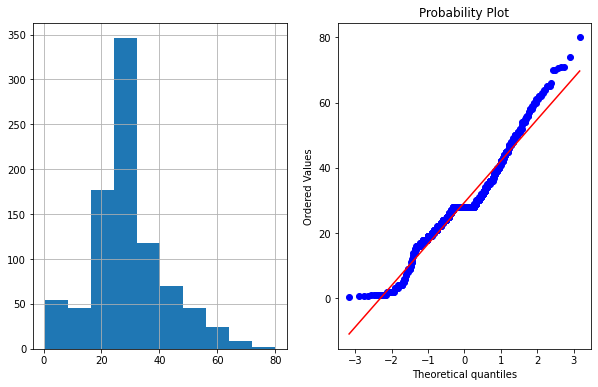

In [ ]:
plot_data(df,'Age')

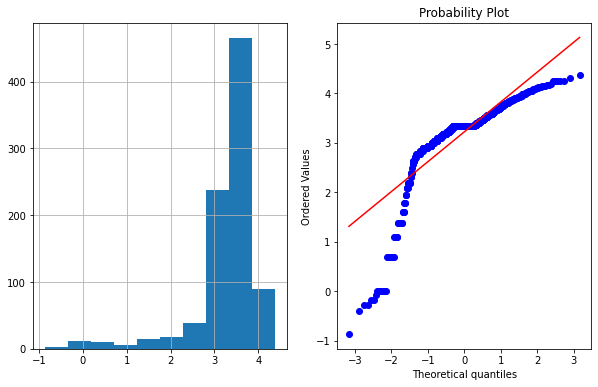

In [ ]:
##Logarithmic transformation
df['Age_log'] = np.log(df.Age)
plot_data(df,'Age_log')

In [ ]:
df.head()

,Survived,Age,Fare,Age_log,Fare_log
0,0,22.0,7.2500,3.091042,1.981001
1,1,38.0,71.2833,3.637586,4.266662
2,1,26.0,7.9250,3.258097,2.070022
3,1,35.0,53.1000,3.555348,3.972177
4,0,35.0,8.0500,3.555348,2.085672


In [ ]:
df.drop(['Fare_log'],axis=1)

,Survived,Age,Fare,Age_log
0,0,22.0,7.2500,3.091042
1,1,38.0,71.2833,3.637586
2,1,26.0,7.9250,3.258097
3,1,35.0,53.1000,3.555348
4,0,35.0,8.0500,3.555348
...,...,...,...,...
886,0,27.0,13.0000,3.295837
887,1,19.0,30.0000,2.944439
888,0,28.0,23.4500,3.332205
889,1,26.0,30.0000,3.258097


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: ignored

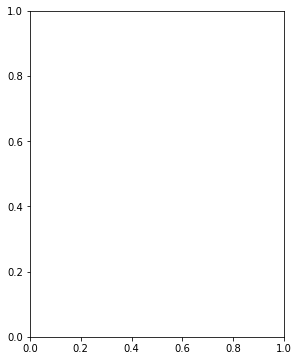

In [ ]:
df['Fare_log'] = np.log(df.Fare)
plot_data(df,'Fare_log')

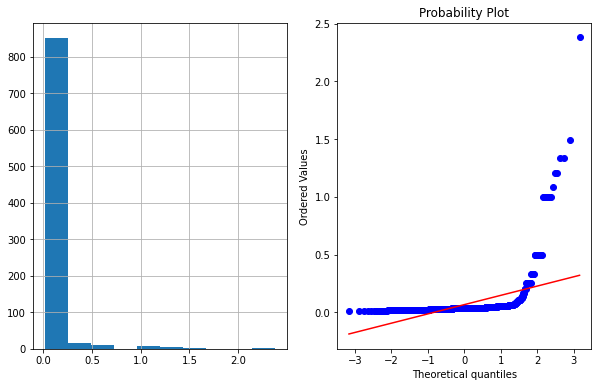

In [ ]:
##Reciprocal Transformation
df['Age_Reciprocal'] = 1/df.Age
plot_data(df,'Age_Reciprocal')

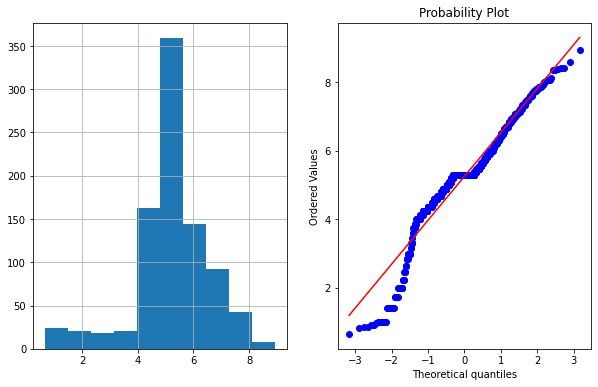

In [ ]:
import math
##Square root transformation
df['Age_sqrt'] = (df.Age)**(1/2)
plot_data(df,'Age_sqrt')

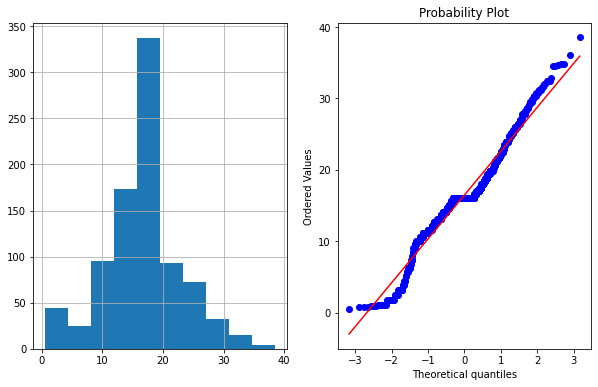

In [ ]:
###exponential transformation
df['Age_Exponential'] = df.Age**(1/1.2)
plot_data(df,'Age_Exponential')

In [ ]:
##BoxCox transformation
df['Age_BoxCox'],Parameter = stat.boxcox(df.Age)

In [ ]:
print(Parameter)

0.7964531473656952


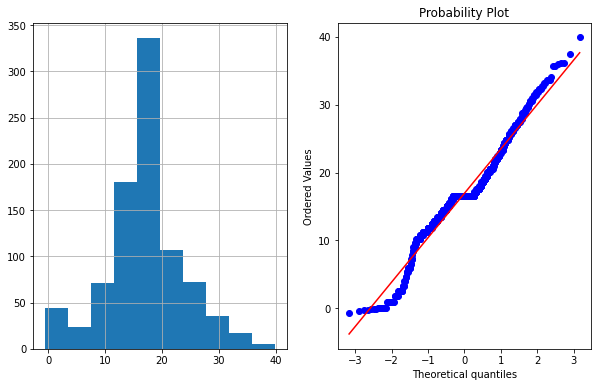

In [ ]:
plot_data(df,'Age_BoxCox')